# Lecture 2

## Imports

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import neighbors
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import sklearn

## Setting Up Data

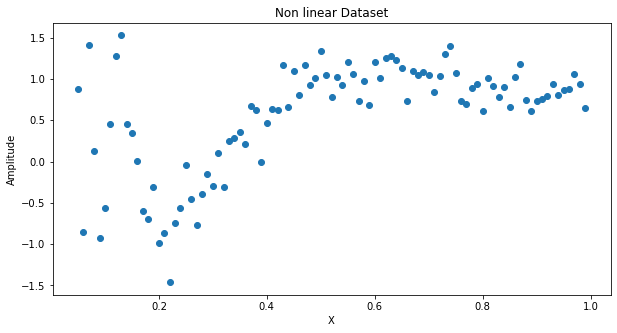

In [2]:
x = np.arange(0.05, 1, 0.01)
y = np.sin(1/x) + np.random.normal(0, 0.25, x.size)

# Plot the data
plt.figure(figsize=(10,5))
plt.scatter(x, y)
plt.title("Non linear Dataset")
plt.xlabel("X")
plt.ylabel("Amplitude")
plt.show()

## Fit Data with K Nearest Neighbors

In [3]:
knn = neighbors.KNeighborsRegressor(n_neighbors=5)
X = x.reshape(-1,1)
knn.fit(X,y)
y_pred = knn.predict(X)

### Plot Fit line from nearest neighbors

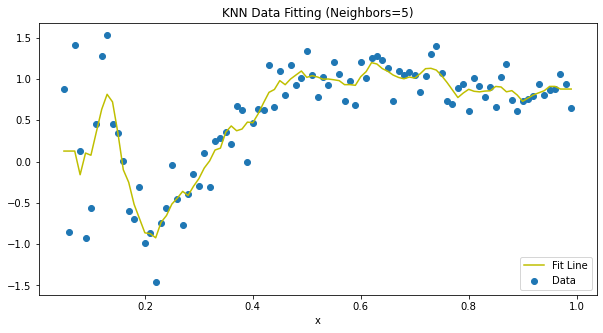

In [4]:
plt.figure(figsize=(10,5))
plt.scatter(x,y, label="Data")
plt.plot(x,y_pred, color="y", label="Fit Line")
plt.title("KNN Data Fitting (Neighbors=5)")
plt.xlabel("x")
plt.legend(loc="lower right")
plt.show()

## End of Part 1

In [9]:
# import the wine dataset using pandas
folder = "C:/Users/Dylan/Documents/Spring 2021/STA 208/DavisSML/data/"
wine = pd.read_csv(folder+"winequality-red.csv", delimiter=";")

In [10]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [14]:
# Create our x and y varaibles
y = wine["quality"].values
X = wine.drop(["quality"], axis=1)

# Separate into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33)

## Exercise 2.1

In [64]:
# First I will use the Linear Regression model from lecture 1
reg = LinearRegression().fit(X_train, y_train)
y_predict = reg.predict(X_test)

mse = ((y_predict - y_test)**2).mean()

# Now I will try to train a model using K nearest neighbors for values of K from 5-20
# First step is to use the StandardScaler to scale all the x parameters
scaler = sklearn.preprocessing.StandardScaler().fit(X_train)
X_train_trans = scaler.transform(X_train)
X_test_trans = scaler.transform(X_test)

# Initialize an array for the mse and array for the K numbers used
start = 2
stop = 250
step = 1
k_array = np.arange(start, stop, step)
mse_knn = []

for k in k_array:
    knn = neighbors.KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train_trans, y_train)
    y_pred = knn.predict(X_test_trans)
    
    # Calculate the mse
    temp_mse = ((y_pred - y_test)**2).mean()
    mse_knn.append(temp_mse)

In [65]:
# Finding knn models using only columns 1 and 10
SUB_COLS = [1, 10]
X_train_sub = X_train_trans[:, SUB_COLS]
X_test_sub = X_test_trans[:, SUB_COLS]
wine_mse = []
for k in k_array:
    knn = neighbors.KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_sub, y_train)
    y_pred = knn.predict(X_test_sub)
    
    # Calculate mse
    temp_mse = ((y_pred - y_test)**2).mean()
    wine_mse.append(temp_mse)
    

### Plotting the mse for the different values of K

MSE of Linear Regression:  0.41851580732018073


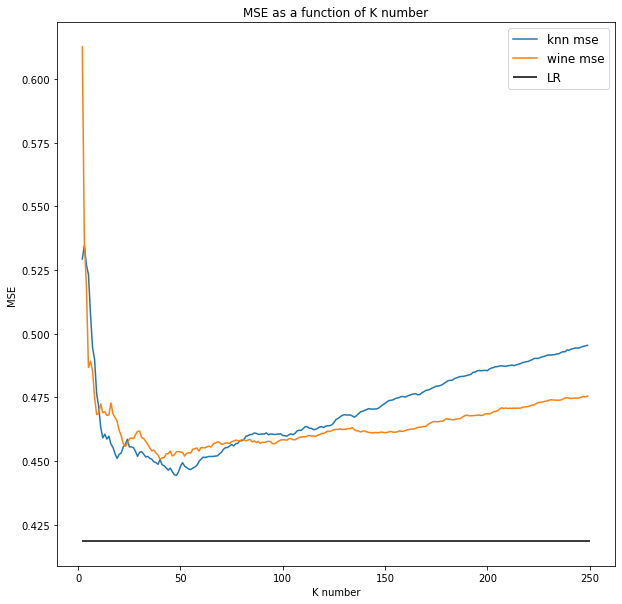

In [68]:
print("MSE of Linear Regression: ", mse)

# Plot mse for all k
plt.figure(figsize=(10,10))
plt.hlines(mse, start, stop, color="k", label="LR")
plt.plot(k_array, mse_knn, label="knn mse")
plt.plot(k_array, wine_mse, label="wine mse")
plt.xlabel("K number")
plt.ylabel("MSE")
plt.title("MSE as a function of K number")
plt.legend(loc="upper right", fontsize="large")
plt.show()